<img src="IMG/logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales - Segundo Cuatrimestre 2025

# Trabajo Práctico Nº0: Primeros pasos en la simulación
#### Matías Cassino

# Consignas

1) Sintetizar y graficar:

    A. Una señal sinusoidal de 2KHz.

    B. Misma señal amplificada y desfazada en π/2.

    C. Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.

    D. Señal anterior recortada al 75% de su potencia.

    E. Una señal cuadrada de 4KHz.

    F. Un pulso rectangular de 10ms.

    G. En cada caso indique tiempo entre muestras, número de muestras y potencia.

2) Verificar ortogonalidad entre la primera señal y las demás.

3) Graficar la autocorrelación de la primera señal y la correlación entre ésta y las demás.

4) Dada la siguiente propiedad trigonométrica:

2⋅ sin(α)⋅ sin(β) = cos(α-β)-cos(α+β)

I. Demostrar la igualdad

II. Mostrar que la igualdad se cumple con señales sinosoidales, considerando α=ω⋅t, el doble de β (Use la frecuencia que desee).

Bonus

1) Graficar la temperatura del procesador de tu computadora en tiempo real.

- Suponiendo distancia entre muestras constante
- Considerando el tiempo de la muestra tomada

2) Bajar un wav de freesoung.org, graficarlo y calcular la energía

# Introducción
En este trabajo se desarrollaron

# Desarrollo experimental

In [1]:
#%% Modulos
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pdsmodulos as pds
from scipy import signal
from scipy.signal import correlate
import time
import psutil
import random
from scipy.io import wavfile

#%% Funciones
plt.close("all")

# Senoidal
def mi_funcion_sen(vmax, dc, ff, ph, N, fs, plot=True):
    
    # Datos generales de la simulación
    ts = 1/fs # tiempo de muestreo
    tt = np.linspace(0, (N-1)*ts, N).flatten() # grilla de sampleo temporal
    arg = 2*np.pi*ff*tt + ph # argumento
    xx = (vmax*(np.sin(arg)) + dc).flatten() # señal
    pot = (1/N)*np.sum(xx**2)
    
    if plot:
        
        #Presentación gráfica de los resultados
        plt.figure()
        plt.plot(tt, xx, label=f"f = {ff} Hz\nN = {N}\nTs = {ts} s\nPotencia = {pot:.3f} W")
        plt.title('Señal senoidal')
        plt.xlabel('tiempo [s]')
        plt.ylabel('Amplitud [V]')
        plt.grid()
        plt.xlim([tt.min() - 0.1*(tt.max()-tt.min()), tt.max() + 0.1*(tt.max()-tt.min())])
        plt.ylim([xx.min() - 0.1*(xx.max()-xx.min()), xx.max() + 0.1*(xx.max()-xx.min())])
        plt.legend()
        plt.show() 
        
    return tt,xx

# Cuadrada
def funcion_cuadrada(vmax, dc, ff, ph, N, fs):
    
    # Datos generales de la simulación
    ts = 1/fs # tiempo de muestreo
    tt = np.linspace(0, (N-1)*ts, N).flatten() # grilla de sampleo temporal
    arg = 2*np.pi*ff*tt + ph # argumento
    xx = (vmax*(signal.square(arg)) + dc).flatten() # señal
    pot = (1/N)*np.sum(xx**2)
    
    #Presentación gráfica de los resultados
    plt.figure()
    plt.plot(tt, xx, label  = f"f = {ff} Hz\nN = {N}\nTs = {ts} s\nPotencia = {pot:.3f} W")
    plt.title('Señal cuadrada')
    plt.xlabel('tiempo [s]')
    plt.ylabel('Amplitud [V]')
    plt.grid()
    plt.xlim([tt.min() - 0.1*(tt.max()-tt.min()), tt.max() + 0.1*(tt.max()-tt.min())])
    plt.ylim([xx.min() - 0.1*(xx.max()-xx.min()), xx.max() + 0.1*(xx.max()-xx.min())])
    plt.legend()
    plt.show() 
        
    return tt,xx

# Pulso rectangular
def funcion_pulso_rectangular(vmax, dc, t_inicio, duracion, N, fs):
    
    # Datos generales de la simulación
    ts = 1/fs # tiempo de muestreo
    tt = np.linspace(0, (N-1)*ts, N).flatten() # grilla de sampleo temporal
    xx=(vmax*(np.heaviside(tt - t_inicio, 1) - np.heaviside(tt - (t_inicio + duracion), 1)) + dc).flatten() #señal con valor 1 en el salto
    pot = (1/N)*np.sum(xx**2)
    
    
    #Presentación gráfica de los resultados
    plt.figure()
    plt.plot(tt*10, xx, label  = f"N = {N}\nTs = {ts} s\nPotencia = {pot:.3f} W")
    plt.title('Señal pulso rectangular')
    plt.xlabel('tiempo [s]')
    plt.ylabel('Amplitud [V]')
    plt.grid()
    plt.legend()
    plt.show() 
        
    return tt,xx

# Senoidal modulada
def sen_modulada(vmax_1, vmax_2, dc_1, dc_2, ff_1, ff_2, ph_1, ph_2, N, fs):
    
    # Datos generales de la simulación
    tt_1,xx_1 = mi_funcion_sen(vmax = vmax_1, dc = dc_1, ff = ff_1, ph = ph_1, N=N,fs=fs, plot=False)
    tt_2,xx_2 = mi_funcion_sen(vmax = vmax_2, dc = dc_2, ff = ff_2, ph = ph_2, N=N,fs=fs, plot=False)
    
    tt_aux=tt_1
    xx_aux = xx_1*xx_2
    pot_mod = (1/N)*np.sum(xx_aux**2)  
    
    #Presentación gráfica de los resultados
    plt.figure()
    plt.plot(tt_1, xx_aux, label  = f"N = {N}\nTs = {1/fs} s\nPotencia = {pot_mod:.3f} W")
    plt.title('Señal senoidal de 2KHz modulada por senoidal de 1KHz')
    plt.xlabel('tiempo [s]')
    plt.ylabel('Amplitud [V]')
    plt.legend()
    plt.xlim([tt_aux.min() - 0.1*(tt_aux.max()-tt_aux.min()), tt_aux.max() + 0.1*(tt_aux.max()-tt_aux.min())])
    plt.ylim([xx_aux.min() - 0.1*(xx_aux.max()-xx_aux.min()), xx_aux.max() + 0.1*(xx_aux.max()-xx_aux.min())])
    plt.grid()
    plt.show() 
        
    return tt_aux,xx_aux


def grafico_correlacion(x, y, fs, N, titulo):
    r_xy = correlate(x, y, mode='full')
    lags = np.arange(-N+1, N)
    t_lags = lags / fs  # eje x como desplazamiento temporal
    
    #Presentación gráfica de los resultados
    plt.figure()
    plt.plot(t_lags, r_xy)
    plt.title(titulo)
    plt.xlabel("Delta t [s]")
    plt.ylabel("Correlación")
    plt.xlim([t_lags.min() - 0.1*(t_lags.max()-t_lags.min()), t_lags.max() + 0.1*(t_lags.max()-t_lags.min())])
    plt.ylim([r_xy.min() - 0.1*(r_xy.max()-r_xy.min()), r_xy.max() + 0.1*(r_xy.max()-r_xy.min())])
    plt.grid()
    plt.show()
    
def bonus1_temperatura(N=10):
    tiempos = []
    temperaturas = []
    t0 = time.time() # Tiempo inicial

    #Presentación gráfica de los resultados
    plt.ion() # Plot interactivo
    fig, ax = plt.subplots()
    linea, = ax.plot([], [], marker="o") # Devuelve una lista 2D vacía y se accede al conjunto de datos en cada actualizacion
    ax.set_xlabel("Tiempo [s]")
    ax.set_ylabel("Temperatura del procesador simulada [°C]")
    ax.set_title("Evolución simulada de la temperatura del procesador")
    ax.grid()

    for _ in range(N):
        carga_cpu = psutil.cpu_percent() # Carga de la cpu
        temp = 50 + carga_cpu * 0.3 + random.uniform(-0.5, 0.5) # Simulacion de temperatura con porcentaje de carga, una constante y ruido
        
        tiempos.append(time.time() - t0) # Guarda tiempos transcurrido
        temperaturas.append(temp) # Guarda temperaturas
        
        linea.set_xdata(tiempos) # Actualizacion de datos en la curva
        linea.set_ydata(temperaturas) # Actualizacion de datos en la curva
        ax.relim() # Ajusta ejes
        ax.autoscale_view() # Ajuste vista
        plt.pause(1) # muestreo cada 1 segundo

    plt.ioff()
    plt.show()
    return tiempos, temperaturas

def bonus2_wav(ruta_wav):
    fs_wav, xx = wavfile.read(ruta_wav)

    # Si es estéreo, tomar un canal
    if xx.ndim > 1: # Cantidad de dimensiones = cantidad de canales
        xx = xx[:, 0] # Toma el canal izquierdo

    tt = np.linspace(0,(len(xx)-1)/fs_wav,len(xx)) # Grilla de sampleo temporal

    #Presentación gráfica de los resultados
    plt.figure()
    plt.plot(tt, xx)
    plt.title("Señal WAV")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid()
    plt.show()

    energia = np.sum(xx**2)
    print(f"Energía de la señal: {energia}")

    return tt, xx, energia
    
def potencia_modificada(xx, tt, N, fs, porcentaje):
    pot=(1/N)*np.sum(xx**2)*(porcentaje/100)
    xx_aux=np.clip(xx,-pot,pot)
    tt_aux=tt
    
    #Presentación gráfica de los resultados
    plt.figure()
    plt.plot(tt_aux, xx_aux, label  = f"N = {N}\nTs = {1/fs} s\nPotencia = {pot:.3f} W")
    plt.title(f'Señal recortada al {porcentaje}% de su potencia')
    plt.xlabel('tiempo [s]')
    plt.ylabel('Amplitud [V]')
    plt.legend()
    plt.grid()
    plt.show()
    
    return tt_aux, xx_aux

def ortogonalidad(x, y, tolerancia):
    prod_interno = np.dot(x, y)
    
    if np.abs(prod_interno) < tolerancia:
        resultado = "Ortogonales"
    else:
        resultado = "No ortogonales"

    return prod_interno, resultado


#%% Parámetros
fs = 50000 # frecuencia de muestreo (Hz)
N = 750   # cantidad de muestras


# Análisis de resultados

1.A 

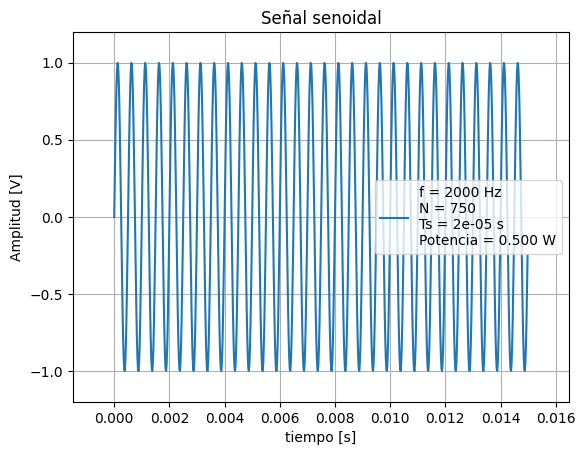

In [2]:
#%% Invocación de las funciones del punto 1.A
tt_a,xx_a = mi_funcion_sen(vmax = 1, dc = 0, ff = 2000, ph=0, N=N,fs=fs)

- Al seleccionar fs >> 2 * ff y N suficientemente grande, esto garantiza el teorema del muestreo y permite representar adecuadamente las curva suaves de la senoidal. Sin embargo, si se opta por una fs > 2 * ff y N pequeño, a pesar de cumplirse Nyquist, la cantidad de muestras por ciclo es escasa y genera una senoidal con picos triangulares o rectos según el caso. Además, en el caso en que la fs > ff * 2 y fs=N, la señal posee muchos ciclos en un eje temporal reducido generando la impresión de una superposición.

1.B  

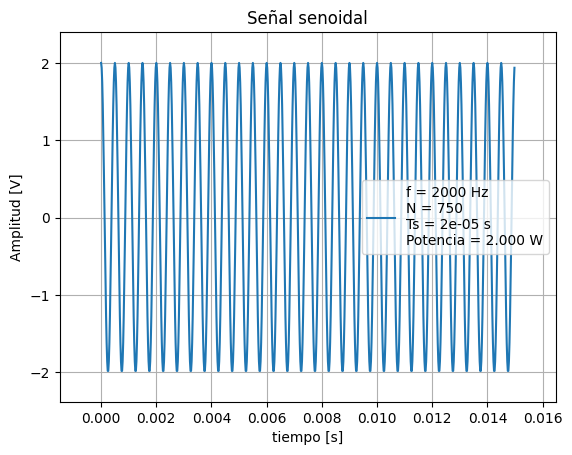

In [3]:
#%% Invocación de las funciones del punto 1.B
tt_b,xx_b = mi_funcion_sen(vmax = 2, dc = 0, ff = 2000, ph=np.pi/2, N=N,fs=fs)

- Idem A. En adición, se evidencia la diferencia de amplitud con magnitud 2 y el desplazamiento de los máximos, mínimos y ceros.

1.C 

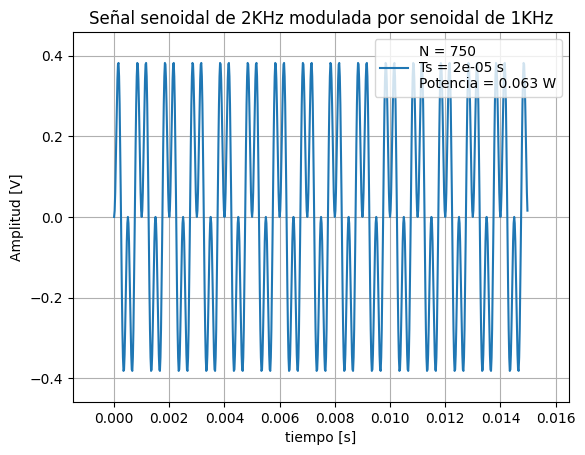

In [4]:
#%% Invocación de las funciones del punto 1.C
tt_c,xx_c = sen_modulada(vmax_1 = 1, vmax_2 = 0.5, dc_1 = 0, dc_2 = 0, ff_1 = 2000, ff_2 = 1000, ph_1 = 0, ph_2 = 0, N=N,fs=fs)

- La señal modulada resulta del producto punto a punto de las dos senoidales con frecuencias múltiplos, es decir, la senoidal de 1KHz afecta la amplitud y el signo de la senoidal de 2KHz resultando en las curvas exhibidas por el gráfico.

1.D 

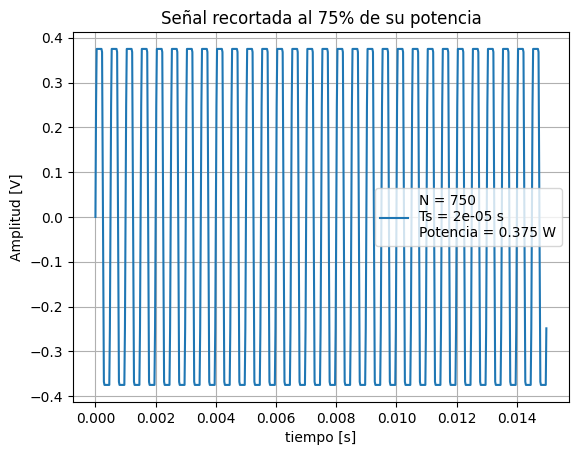

In [5]:
#%% Invocación de las funciones del punto 1.D
tt_d,xx_d = potencia_modificada(xx = xx_a, tt = tt_a, N=N, fs=fs, porcentaje = 75)

- La señal excluye los valores que superan el umbral establecido y, en efecto, los extremos se aplanan. También, los puntos pertenecientes al rango no se ven afectados.

1.E 

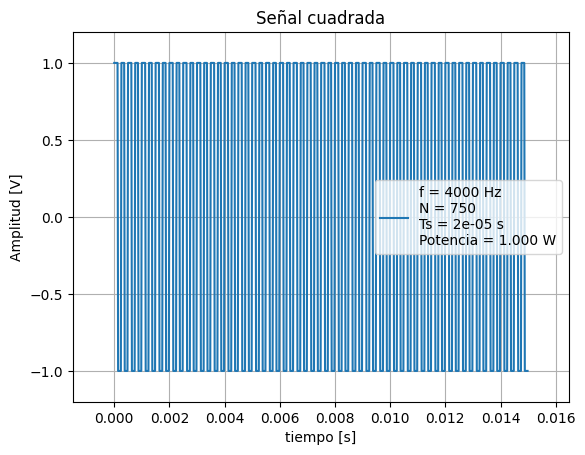

In [6]:
#%% Invocación de las funciones del punto 1.E
tt_e,xx_e = funcion_cuadrada(vmax = 1, dc = 0, ff = 4000, ph=0, N=N,fs=fs)

- La señal cuadrada se observa con gran densidad de ciclos debido a que se representa con 12.5 muestras por cada uno en una ventana temporal de 0.015 segundos. Por lo tanto, se cumple el teorema de Nyquist pero no se distinguen los ciclos a causa del reducido periodo.

1.F 

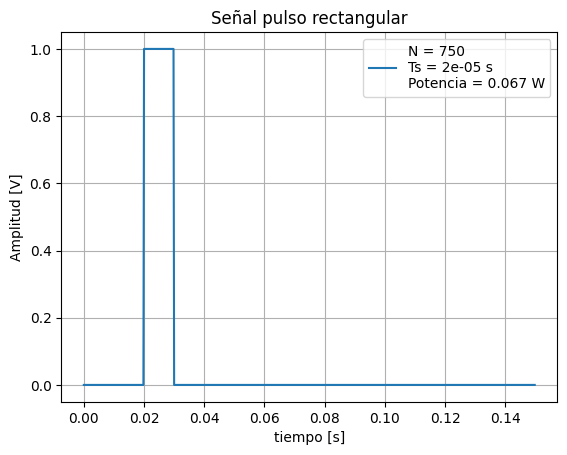

In [7]:
#%% Invocación de las funciones del punto 1.F
tt_f,xx_f = funcion_pulso_rectangular(vmax = 1, dc = 0, t_inicio=0.002, duracion=0.001, N=N,fs=fs)

- La señal se ajusta óptimamente a la ventana temporal de 0.015 segundos siendo representado por 50 muestras en su máxima amplitud. Cabe destacar que el eje temporal fue escalado por 10 debido a que la alteración de los parámetros de N y fs correspondientes a la señal afectarían el cálculo de la correlación posterior.

2. 

In [8]:
#%% Invocación de las funciones del punto 2
ortogonalidad_a_con_a, resultado_aa = ortogonalidad(xx_a, xx_a, 10**(-6))
ortogonalidad_a_con_b, resultado_ab = ortogonalidad(xx_a, xx_b, 10**(-6))
ortogonalidad_a_con_c, resultado_ac = ortogonalidad(xx_a, xx_c, 10**(-6))
ortogonalidad_a_con_d, resultado_ad = ortogonalidad(xx_a, xx_d, 10**(-6))
ortogonalidad_a_con_e, resultado_ae = ortogonalidad(xx_a, xx_e, 10**(-6))
ortogonalidad_a_con_f, resultado_af = ortogonalidad(xx_a, xx_f, 10**(-6))

print(f"El producto interno entre A y A resulta: {ortogonalidad_a_con_a:.6e} → {resultado_aa}")
print(f"El producto interno entre A y B resulta: {ortogonalidad_a_con_b:.6e} → {resultado_ab}")
print(f"El producto interno entre A y C resulta: {ortogonalidad_a_con_c:.6e} → {resultado_ac}")
print(f"El producto interno entre A y D resulta: {ortogonalidad_a_con_d:.6e} → {resultado_ad}")
print(f"El producto interno entre A y E resulta: {ortogonalidad_a_con_e:.6e} → {resultado_ae}")
print(f"El producto interno entre A y F resulta: {ortogonalidad_a_con_f:.6e} → {resultado_af}")

El producto interno entre A y A resulta: 3.750000e+02 → No ortogonales
El producto interno entre A y B resulta: 4.028888e-12 → Ortogonales
El producto interno entre A y C resulta: -1.112938e-13 → Ortogonales
El producto interno entre A y D resulta: 1.748996e+02 → No ortogonales
El producto interno entre A y E resulta: 2.817188e+01 → No ortogonales
El producto interno entre A y F resulta: -5.551115e-17 → Ortogonales


- Del producto interno entre la señal A y las demás resultó que esta es ortogonal con B (la senoidal de igual frecuencia, amplitud distinta y desfase pi/2), C (la señal derivada de modular con una senoidal de la mitad de la frecuencia) y F (el pulso rectangular que cubre una fracción de la señal y luego sus áreas se cancelan debido a su carácter nulo en gran parte del intervalo temporal). En consecuencia, la ortogonalidad depende del tipo de señal, el desfase y la frecuencia.

3. 

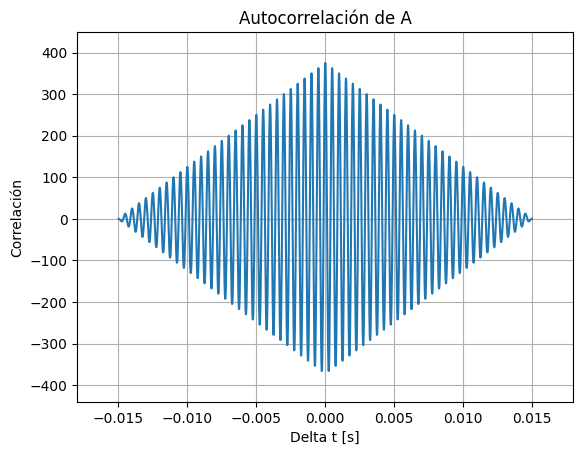

In [9]:
#%% Invocación de las funciones del punto 3
# Autocorrelación de la señal A
grafico_correlacion(xx_a, xx_a, fs, N, "Autocorrelación de A")

- La autocorrelación de la señal consigo misma posee máximos en los desplazamientos temporales múltiplos de su periodo.

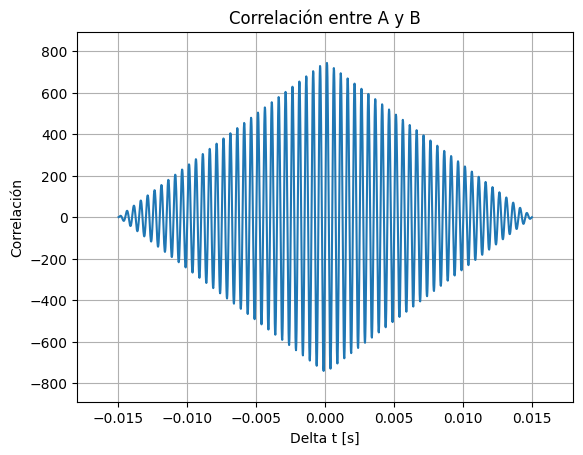

In [10]:
# Correlación cruzada entre A y B
grafico_correlacion(xx_a, xx_b, fs, N, "Correlación entre A y B")

- El gráfico posee gran similitud con el anterior pero el eje horizontal es aproximadamente el doble producto de la mayor amplitud de la señal B que afecta linealmente el cálculo.

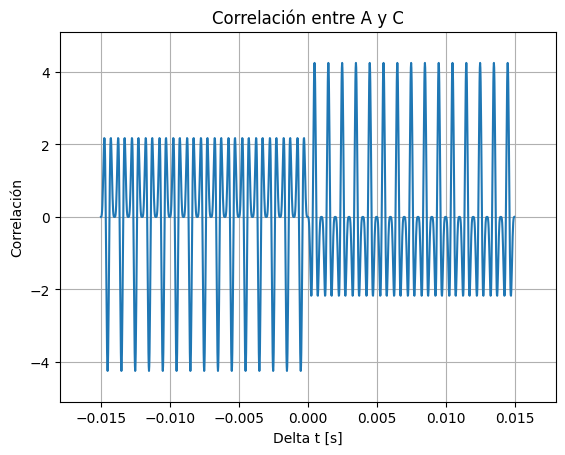

In [11]:
# Correlación cruzada entre A y C
grafico_correlacion(xx_a, xx_c, fs, N, "Correlación entre A y C")

- Se invierte la simetría a cada lado del eje de coordenadas, por ejemplo, en el primer cuadrante se exhiben senoidales separadas y en el cuarto cuadrantes estas se superponen. Esto es consecuencia del producto punto a punto que genera zonas donde la señal original se amplifica o atenúa y pierde similitud con A.

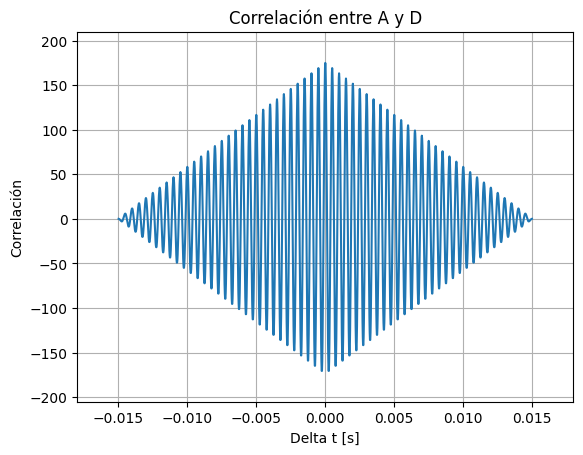

In [12]:
# Correlación cruzada entre A y D
grafico_correlacion(xx_a, xx_d, fs, N, "Correlación entre A y D")

- La imagen es semejante a la de correlación de A consigo misma, pero con un eje vertical menor dado que se redujo la amplitud de D y, por ende, también disminuye la relación con A.

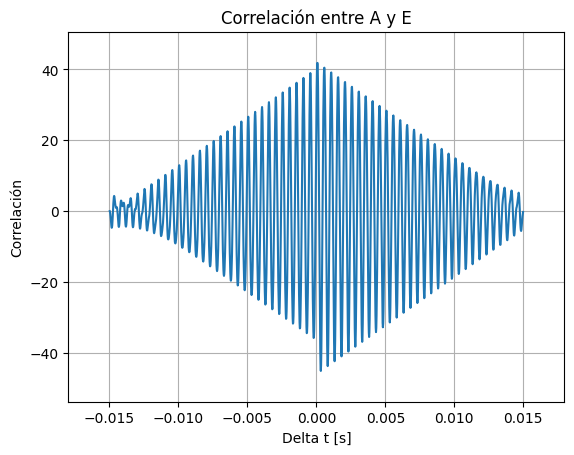

In [13]:
# Correlación cruzada entre A y E
grafico_correlacion(xx_a, xx_e, fs, N, "Correlación entre A y E")

- La correlación es similar a la expuesta para la señal A con otras senoidales pero con el rango vertical más reducido debido a que ambas señales comparten energía parcialmente en los extremos, donde la señal cuadrada además posee saltos abruptos.

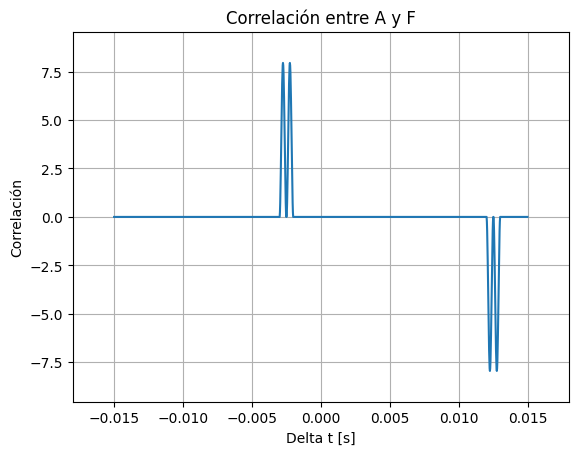

In [14]:
# Correlación cruzada entre A y F
grafico_correlacion(xx_a, xx_f, fs, N, "Correlación entre A y F")

- La figura expone una simetría invertida y no equiespaciada en los valores no nulos de correlación, lo cual deriva de que el pulso rectangular coincida solo en una fracción de la ventana temporal con A y esa sea su única contribución.

4.

In [15]:
from IPython.display import IFrame
IFrame("IMG/Consigna_4_TS1.pdf", width=1000, height=1000)

Bonus 1.

In [16]:
#%% Invocación de la función del Bonus 1
#tiempos, temperaturas = bonus1_temperatura(N=10)
from IPython.display import IFrame
IFrame("IMG/Consigna_B1_TS1.pdf", width=1000, height=1000)

- Adjunto una imagen del gráfico ya que al generarse en tiempo real en el notebook se observaría un único punto. Además, la curva se desarrolló con una simulación de valores, previamente especificados en el desarrollo experimental, ya que mi sistema operativo es Windows y requiere de ciertos programas para la lectura de sensores internos, los cuales son bloqueados por el antivirus. Por lo tanto, desarrolle algo semejante.

Bonus 2.

C:\Users\Nancy\AppData\Local\Temp\ipykernel_12908\1338016822.py:162: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_wav, xx = wavfile.read(ruta_wav)


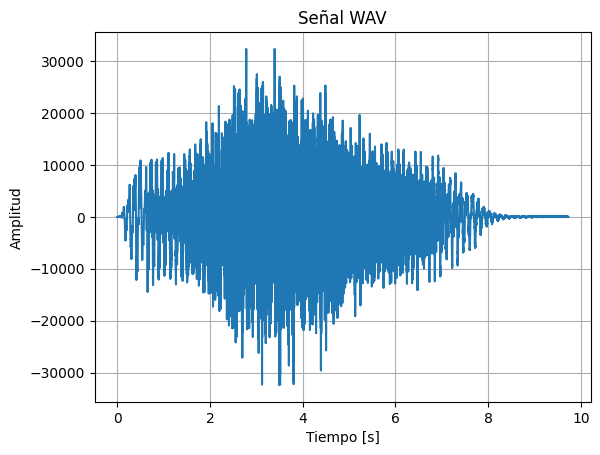

Energía de la señal: 138525051


In [17]:
#%% Invocación de la función del Bonus 2
tt, xx, energia = bonus2_wav(ruta_wav="sonido/sonido.wav")

- La señal resultante coincide con la imagen preliminar de "Freesoung" a partir de operar con los datos extraidos, tales como la frecuencia de muestreo y la cantidad de muestras, y la consideración de un solo canal de audio.

# Conclusiones
Finalmente, se deduce que la ortogonalidad se produce, al menos en este trabajo, entre señales de igual forma con parámetros como la fase, la frecuencia y la amplitud alterados. Además, esto sucede frente a señales que son nulas en gran parte de su período. 
En adición, se constantó que los gráficos de las señales dependen fundamentalmente de N y fs, los cuales determinan la suavidad, el timpo y los ciclos de la representación. También, la curva de la correlación permitió comprender cuán similares son las señales entre sí según su forma.

# Autoevaluación
A) Resolví la tarea con seguridad.

B) Lo aprendido en esta tarea fue la capacidad de determinar los valores de N y fs requeridos según el tipo de señal y su respectiva frecuencia, las causas de la ortogonalidad entre funciones, y los efectos gráficos de la correlación entre funciones.

C)  Sí, use chatGPT para los códigos asociados a la generación de valores aleatorios y el gráfico interactivo en el Bonus 1, y la extracción de datos del Bonus 2.
